In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
df=pd.read_csv('50_Startups.csv')

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [7]:
df.shape

(50, 5)

## DATA EXPLORATION

In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df=df[['Profit','R&D Spend', 'Administration', 'Marketing Spend','State']]
print(df)

       Profit  R&D Spend  Administration  Marketing Spend       State
0   192261.83  165349.20       136897.80        471784.10    New York
1   191792.06  162597.70       151377.59        443898.53  California
2   191050.39  153441.51       101145.55        407934.54     Florida
3   182901.99  144372.41       118671.85        383199.62    New York
4   166187.94  142107.34        91391.77        366168.42     Florida
5   156991.12  131876.90        99814.71        362861.36    New York
6   156122.51  134615.46       147198.87        127716.82  California
7   155752.60  130298.13       145530.06        323876.68     Florida
8   152211.77  120542.52       148718.95        311613.29    New York
9   149759.96  123334.88       108679.17        304981.62  California
10  146121.95  101913.08       110594.11        229160.95     Florida
11  144259.40  100671.96        91790.61        249744.55  California
12  141585.52   93863.75       127320.38        249839.44     Florida
13  134307.35   9199

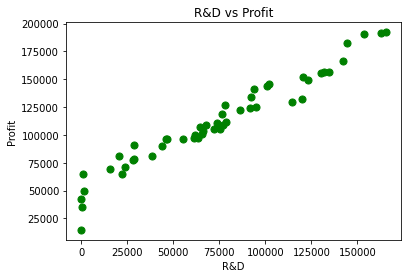

In [12]:
#Plot R&D vs Profit............
x1 = df.iloc[:, 1].values
y1 = df.iloc[:, 0].values
plt.scatter(x1,y1,color='Green',s=50)
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D vs Profit')
plt.show()

From the above plot we can able to visualize that R&D and Profit has positive correlation.

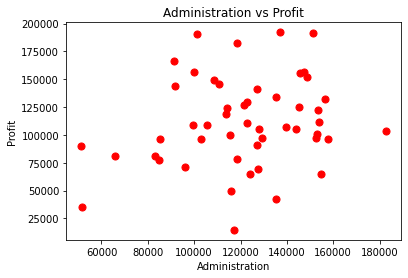

In [13]:
#Plot Administration vs Profit
x1 = df.iloc[:, 2].values
y1 = df.iloc[:, 0].values
plt.scatter(x1,y1,color='Red',s=50)
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Administration vs Profit')
plt.show()

From above plot - Zero correlation between Administration and Profit.

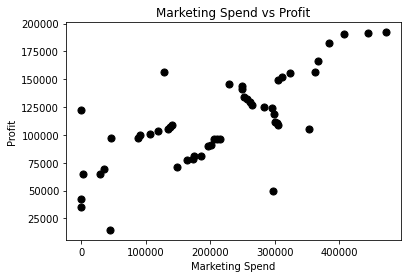

In [14]:
#Plot Marketing Spend vs Profit
x1 = df.iloc[:, 3].values
y1 = df.iloc[:, 0].values
plt.scatter(x1,y1,color='Black',s=50)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit')
plt.show()

From above plot -High correlation between Marketing Spend and Profit.

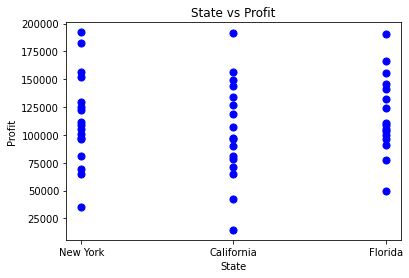

In [15]:
#Plot State vs Profit
x1 = df.iloc[:, 4].values
y1 = df.iloc[:, 0].values
plt.scatter(x1,y1,color='Blue',s=50)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('State vs Profit')
plt.show()

Seperating dependent and independent variables

As state column has a categorical variable. So,convert categorical variable to numerical using LabelEncode and OneHotEncode.

## random forest

In [16]:
#from sklearn.ensemble import IsolationForest
#import pandas as pd

In [17]:
#df.info()

In [18]:
# training the model
#clf = IsolationForest(random_state=10,contamination=.01)
#clf.fit(df)

In [19]:
# predictions
#y_pred_outliers = clf.predict(df1)

In [20]:
#-1 for outliers and 1 for inliers.
#y_pred_outliers

In [21]:
#df1['scores']=clf.decision_function(df1)

In [22]:
#df1['anomaly']=clf.predict(df1.iloc[:,0:7])

In [23]:
#df1.head()

In [24]:
#Print the outlier data points
#df1[df1['anomaly']==-1]

48th record is outlier so we will remove it

In [25]:
df1 = df.drop(df.index[48],axis=0).reset_index()

In [26]:
import pandas as pd

In [27]:
df_encoded=pd.get_dummies(df)

In [28]:
df_encoded

,Profit,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,192261.83,165349.20,136897.80,471784.10,0,0,1
1,191792.06,162597.70,151377.59,443898.53,1,0,0
2,191050.39,153441.51,101145.55,407934.54,0,1,0
3,182901.99,144372.41,118671.85,383199.62,0,0,1
4,166187.94,142107.34,91391.77,366168.42,0,1,0
5,156991.12,131876.90,99814.71,362861.36,0,0,1
6,156122.51,134615.46,147198.87,127716.82,1,0,0
7,155752.60,130298.13,145530.06,323876.68,0,1,0
8,152211.77,120542.52,148718.95,311613.29,0,0,1
9,149759.96,123334.88,108679.17,304981.62,1,0,0


In [29]:
df1=df_encoded.dropna()

In [30]:
df1.head()

,Profit,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,192261.83,165349.20,136897.80,471784.10,0,0,1
1,191792.06,162597.70,151377.59,443898.53,1,0,0
2,191050.39,153441.51,101145.55,407934.54,0,1,0
3,182901.99,144372.41,118671.85,383199.62,0,0,1
4,166187.94,142107.34,91391.77,366168.42,0,1,0


## Renaming the columns

In [31]:
df2 = df1.rename({'State_California': 'California'}, axis=1)

In [32]:
df3 = df2.rename({'State_Florida': 'Florida'}, axis=1)

In [33]:
df4 = df3.rename({'State_New York': 'NewYork'}, axis=1)

In [34]:
df4.head()

,Profit,R&D Spend,Administration,Marketing Spend,California,Florida,NewYork
0,192261.83,165349.20,136897.80,471784.10,0,0,1
1,191792.06,162597.70,151377.59,443898.53,1,0,0
2,191050.39,153441.51,101145.55,407934.54,0,1,0
3,182901.99,144372.41,118671.85,383199.62,0,0,1
4,166187.94,142107.34,91391.77,366168.42,0,1,0


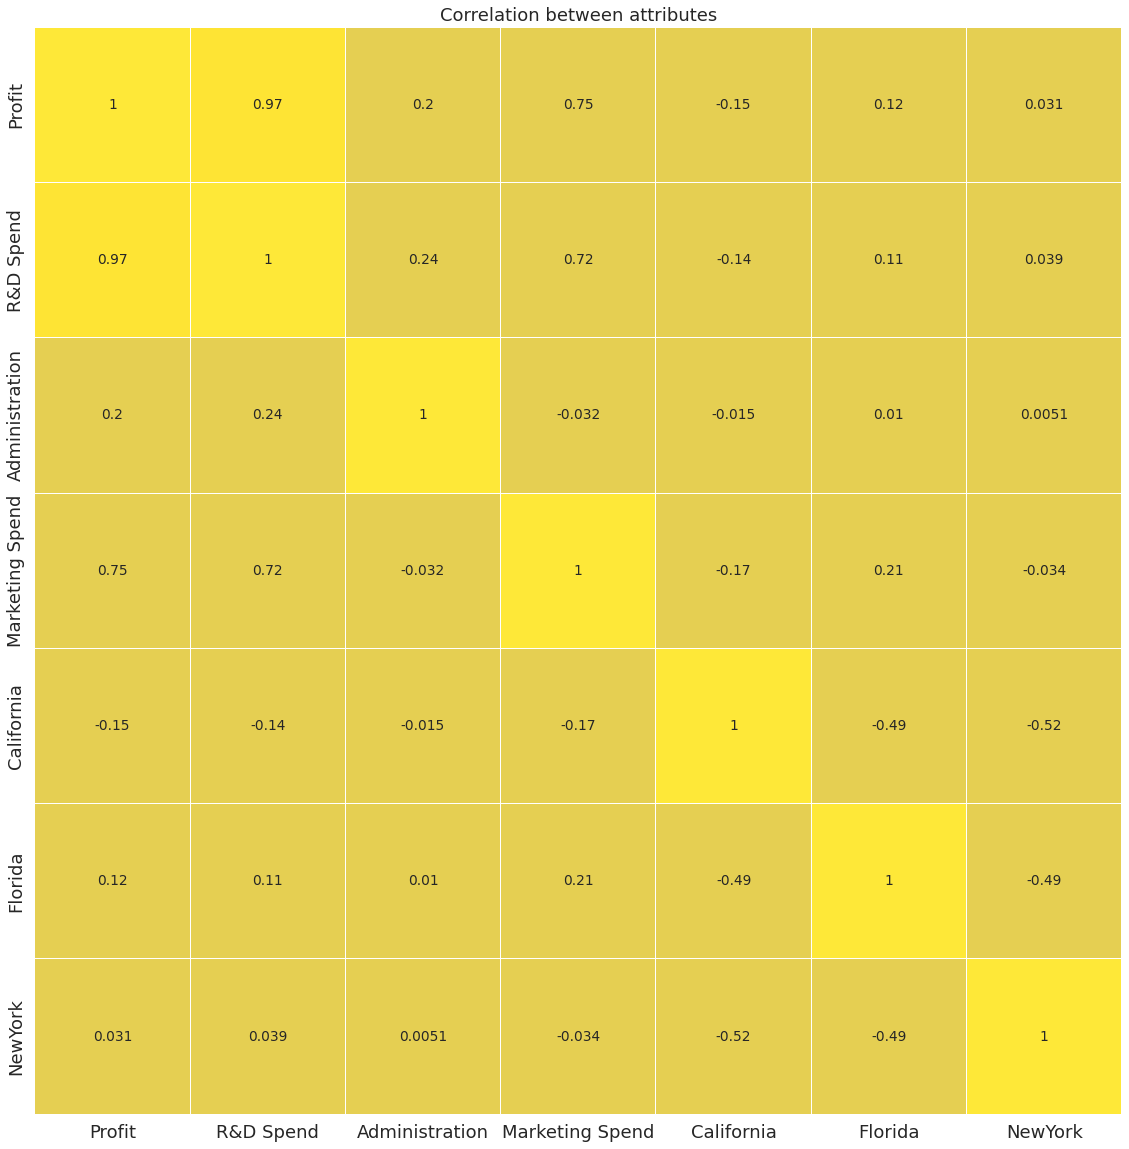

In [35]:
import seaborn as sns

cor=df4.corr()
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(25,20))
sns.heatmap(cor,vmin=0.8,cmap='cividis', annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

In [36]:
X = df4.iloc[:, 1:]
print(X)

    R&D Spend  Administration  Marketing Spend  California  Florida  NewYork
0   165349.20       136897.80        471784.10           0        0        1
1   162597.70       151377.59        443898.53           1        0        0
2   153441.51       101145.55        407934.54           0        1        0
3   144372.41       118671.85        383199.62           0        0        1
4   142107.34        91391.77        366168.42           0        1        0
5   131876.90        99814.71        362861.36           0        0        1
6   134615.46       147198.87        127716.82           1        0        0
7   130298.13       145530.06        323876.68           0        1        0
8   120542.52       148718.95        311613.29           0        0        1
9   123334.88       108679.17        304981.62           1        0        0
10  101913.08       110594.11        229160.95           0        1        0
11  100671.96        91790.61        249744.55           1        0        0

In [37]:
y = df4.iloc[:, 0]
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [39]:
X_train.shape

(40, 6)

In [40]:
X_test.shape

(10, 6)

In [41]:
y_train.shape

(40,)

In [42]:
y_test.shape

(10,)

In [43]:
X_train.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'California',
       'Florida', 'NewYork'],
      dtype='object')

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['R&D Spend', 'Administration','Marketing Spend','California','Florida','NewYork']] = scaler.fit_transform(X_train[['R&D Spend', 'Administration','Marketing Spend','California','Florida','NewYork']])
X_train.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,NewYork
12,0.342021,0.227877,0.124250,-0.693889,1.362770,-0.693889
4,1.362078,-1.097474,1.149907,-0.693889,1.362770,-0.693889
37,-0.710813,-2.577019,-0.341368,1.441153,-0.733799,-0.693889
8,0.906114,1.017237,0.668902,-0.693889,-0.733799,1.441153
3,1.409971,-0.091154,1.300069,-0.693889,-0.733799,1.441153


In [45]:
from sklearn.linear_model import LinearRegression
regressor_best = LinearRegression()
regressor_best.fit(X_train, y_train)

LinearRegression()

In [46]:
regressor_best

LinearRegression()

In [47]:
regressor_best.intercept_

115651.72050000001

In [48]:
regressor_best.coef_

array([38102.26926978, -1864.75430033,  3386.17580673,  -151.22152428,
         293.77926269,  -147.94863325])

In [49]:
y_pred_test = regressor_best.predict(X_test)
y_pred_test

array([ 4.10813717e+09,  1.90711942e+09,  2.45519014e+09, -1.86841337e+08,
        4.29308035e+09, -7.57194226e+07,  3.05545575e+09,  2.67092102e+09,
        2.33122689e+09,  3.00663609e+09])

In [50]:
print(y_test)

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64


In [51]:
y_test.tail()

48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

In [52]:
y_pred_train = regressor_best.predict(X_train)
y_pred_train

array([129287.25932268, 174098.25202606,  91886.85822604, 150220.99659011,
       173623.19035616, 156165.84489947,  76521.47893717,  56930.33870602,
        44712.3085635 , 145679.58311302, 155019.87822287, 116405.47712513,
       113471.56812701,  86876.30432577,  95418.08570235, 191913.7274038 ,
        62092.25276442, 113876.00520371,  98993.33790342, 164246.36680458,
        99560.68684705, 136274.54962586,  75324.0220735 , 187861.47839007,
       115558.98201737, 183805.40426665,  58825.43932911,  91390.89209802,
       111197.68506734,  74197.75183475, 136305.2407773 , 115188.84018874,
       129833.75780392,  47329.63344539, 116544.51129346, 159597.70047229,
        70875.84128325, 148486.45402739,  99143.48842753,  71327.34640771])

In [53]:
from sklearn.metrics import r2_score

In [54]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(R2_train," ",R2_test)

0.9537019995248526   -9379170860.515594


### USING STATS METHOD FOR FINDING COOK'S DISTANCE

In [55]:
df4.columns

Index(['Profit', 'R&D Spend', 'Administration', 'Marketing Spend',
       'California', 'Florida', 'NewYork'],
      dtype='object')

In [56]:
df5 = df4.rename({'R&D Spend': 'RandD_Spend'}, axis=1)

In [57]:
df6 = df5.rename({'Marketing Spend': 'Marketing_Spend'}, axis=1)

In [58]:
df6.head()

,Profit,RandD_Spend,Administration,Marketing_Spend,California,Florida,NewYork
0,192261.83,165349.20,136897.80,471784.10,0,0,1
1,191792.06,162597.70,151377.59,443898.53,1,0,0
2,191050.39,153441.51,101145.55,407934.54,0,1,0
3,182901.99,144372.41,118671.85,383199.62,0,0,1
4,166187.94,142107.34,91391.77,366168.42,0,1,0


In [59]:
import statsmodels.formula.api as smf
model1 = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend+California+Florida+NewYork',data=df6).fit()

In [60]:
model1.params

Intercept          37633.233317
RandD_Spend            0.806023
Administration        -0.027004
Marketing_Spend        0.026980
California         12492.110514
Florida            12690.899307
NewYork            12450.223495
dtype: float64

In [61]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept           7.417409
RandD_Spend        17.368580
Administration     -0.517012
Marketing_Spend     1.573889
California          5.099242
Florida             4.654306
NewYork             5.007401
dtype: float64 
 Intercept          2.807645e-09
RandD_Spend        2.578772e-21
Administration     6.077373e-01
Marketing_Spend    1.226769e-01
California         6.942555e-06
Florida            2.992503e-05
NewYork            9.409010e-06
dtype: float64


In [62]:
(model1.rsquared,model1.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

## CALCULATING VIF

In [63]:
rsq_RandD = smf.ols('RandD_Spend~Administration+Marketing_Spend+California+Florida+NewYork',data=df6).fit().rsquared
vif_RandD = 1/(1-rsq_RandD)

rsq_Ad = smf.ols('Administration~RandD_Spend+Marketing_Spend+California+Florida+NewYork',data=df6).fit().rsquared
vif_Ad = 1/(1-rsq_Ad)

rsq_MS = smf.ols('Marketing_Spend~Administration+RandD_Spend+California+Florida+NewYork',data=df6).fit().rsquared
vif_MS = 1/(1-rsq_MS)

rsq_Cal = smf.ols('California~Administration+Marketing_Spend+RandD_Spend+Florida+NewYork',data=df6).fit().rsquared
vif_Cal = 1/(1-rsq_Cal)

rsq_Fl = smf.ols('Florida~Administration+Marketing_Spend+California+RandD_Spend+NewYork',data=df6).fit().rsquared
vif_Fl = 1/(1-rsq_Fl)

rsq_NY = smf.ols('NewYork~Administration+Marketing_Spend+California+Florida+RandD_Spend',data=df6).fit().rsquared
vif_NY = 1/(1-rsq_NY)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


In [64]:
df6.columns

Index(['Profit', 'RandD_Spend', 'Administration', 'Marketing_Spend',
       'California', 'Florida', 'NewYork'],
      dtype='object')

In [65]:
d1 = {'Variables':['RandD_Spend','Administration','Marketing_Spend','California','Florida','NewYork'],'VIF':[vif_RandD,vif_Ad,vif_MS,vif_Cal,vif_Fl,vif_NY]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RandD_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797
3,California,inf
4,Florida,inf
5,NewYork,inf


## RESIDUAL ANALYSIS

### Test for Normality of Residuals

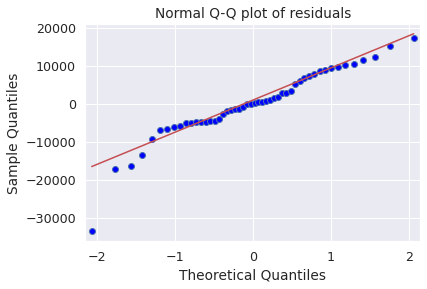

In [66]:
import statsmodels.api as sm

model = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend+California+Florida+NewYork',data=df6).fit()
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

### Residual plot for Homoscedasticity

In [67]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

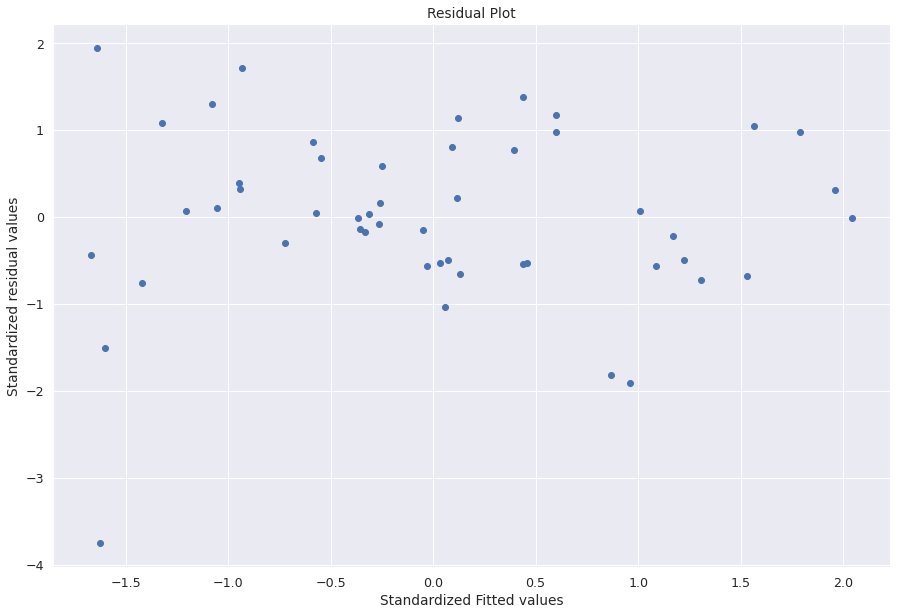

In [68]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual vs Regressor

In [69]:
df6.columns

Index(['Profit', 'RandD_Spend', 'Administration', 'Marketing_Spend',
       'California', 'Florida', 'NewYork'],
      dtype='object')

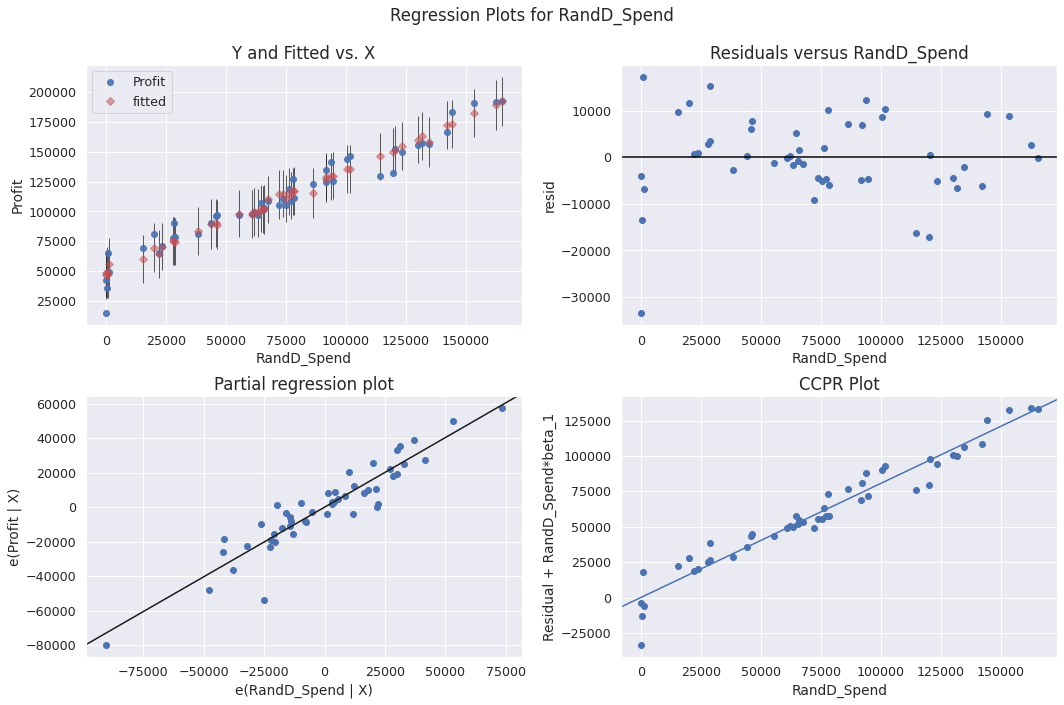

In [70]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model1,'RandD_Spend',fig=fig)
plt.show()

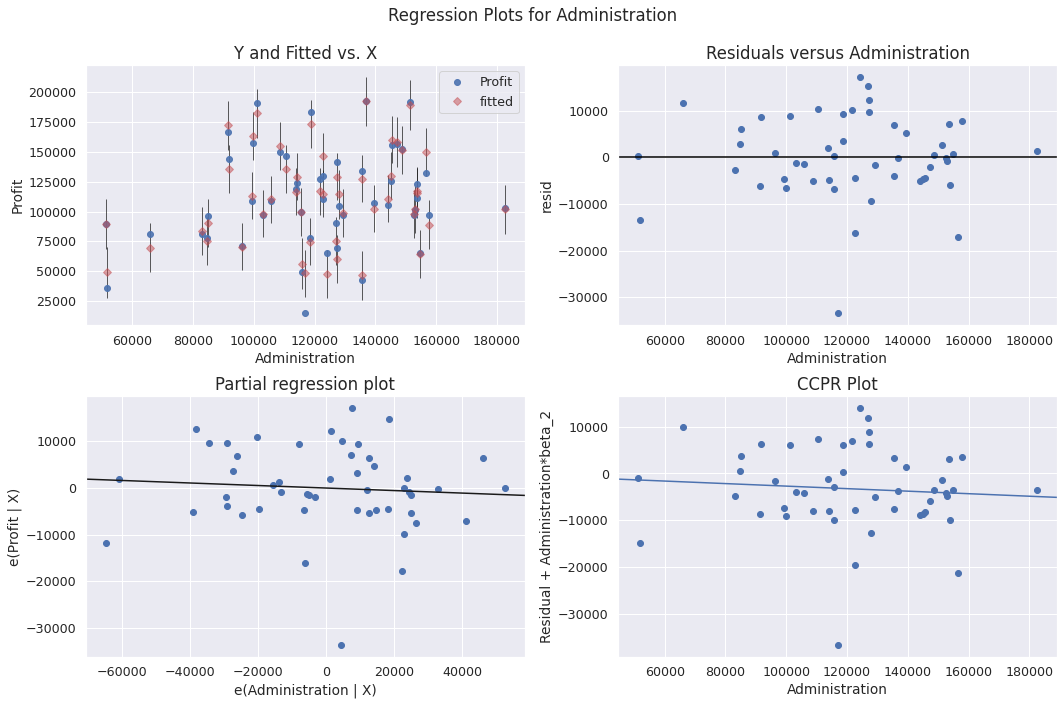

In [71]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model1,'Administration',fig=fig)
plt.show()

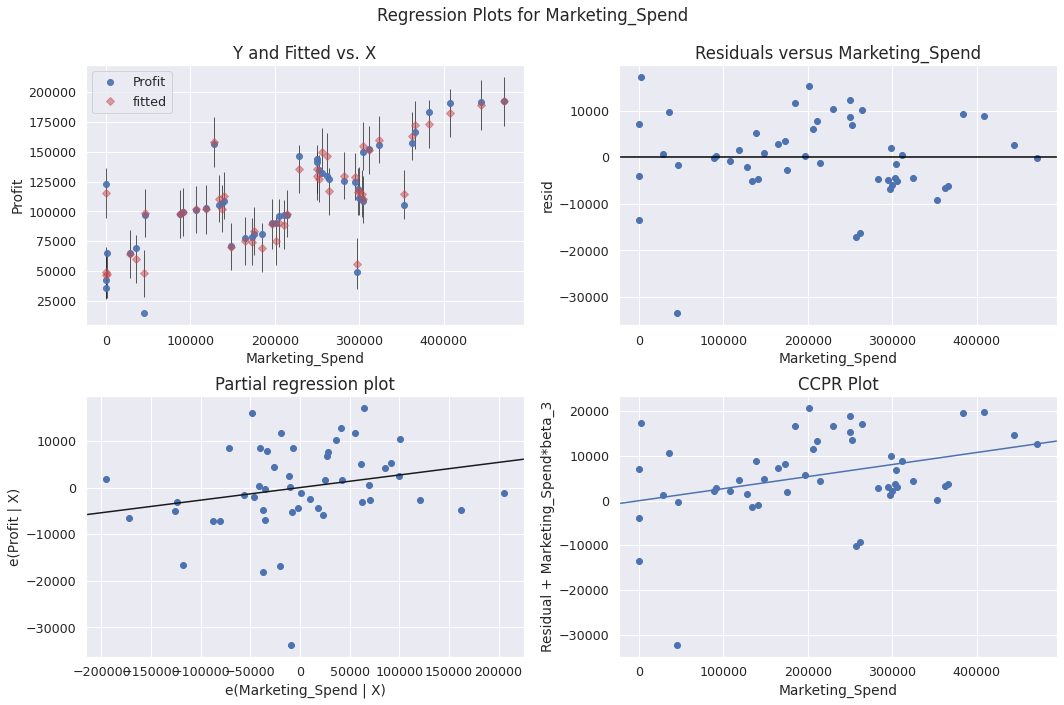

In [72]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model1,'Marketing_Spend',fig=fig)
plt.show()

## MODEL DELETION DIAGNOSTICS

## COOK'S DISTANCE

In [73]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


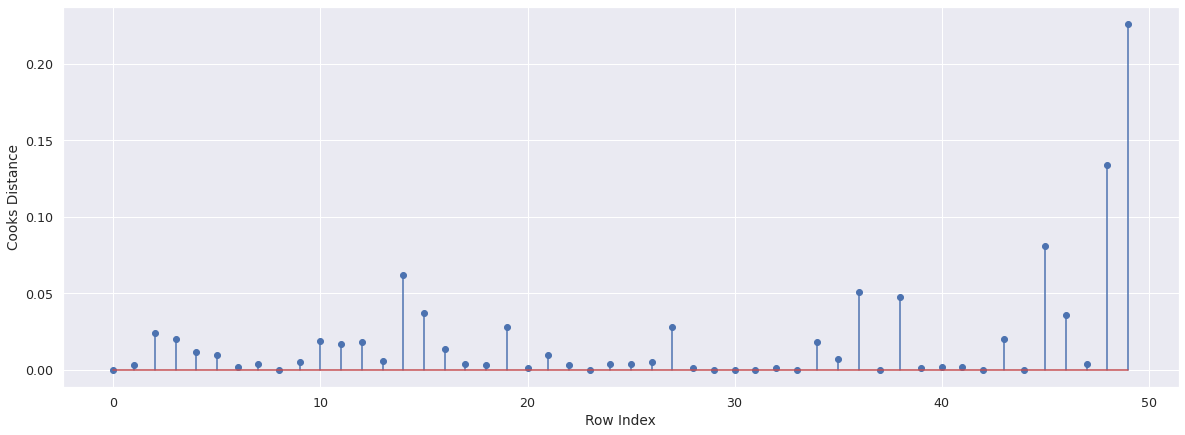

In [74]:
#plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df6)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [75]:
#index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(49, 0.22625094501509282)

### SINCE COOKS DISTANCE IS LESS THAN ONE , WE DON'T NEED TO DO FURTHER ITERATIONS

### dropping State column to check if it affects the accuracy

### NORMALIZATION

In [76]:
df6.head()

,Profit,RandD_Spend,Administration,Marketing_Spend,California,Florida,NewYork
0,192261.83,165349.20,136897.80,471784.10,0,0,1
1,191792.06,162597.70,151377.59,443898.53,1,0,0
2,191050.39,153441.51,101145.55,407934.54,0,1,0
3,182901.99,144372.41,118671.85,383199.62,0,0,1
4,166187.94,142107.34,91391.77,366168.42,0,1,0


In [77]:
 # Drop 'State' column, since it is non numrical
df6.drop(['California','Florida','NewYork'], axis=1, inplace=True)
df6.head()

,Profit,RandD_Spend,Administration,Marketing_Spend
0,192261.83,165349.20,136897.80,471784.10
1,191792.06,162597.70,151377.59,443898.53
2,191050.39,153441.51,101145.55,407934.54
3,182901.99,144372.41,118671.85,383199.62
4,166187.94,142107.34,91391.77,366168.42


In [78]:
from sklearn.preprocessing import MinMaxScaler
norm =MinMaxScaler()
df6_norm = norm.fit_transform(df6)

In [79]:
df7=pd.DataFrame(df6_norm)

In [80]:
df7.columns=['Profit','RandD_Spend',	'Administration', 'Marketing_Spend']
df7.head()

,Profit,RandD_Spend,Administration,Marketing_Spend
0,1.000000,1.000000,0.651744,1.000000
1,0.997355,0.983359,0.761972,0.940893
2,0.993178,0.927985,0.379579,0.864664
3,0.947292,0.873136,0.512998,0.812235
4,0.853171,0.859438,0.305328,0.776136


## MODEL-2

### SQUARE ROOT TRANSFORMATION

In [81]:
df8 = df7.copy()
df8.head()

,Profit,RandD_Spend,Administration,Marketing_Spend
0,1.000000,1.000000,0.651744,1.000000
1,0.997355,0.983359,0.761972,0.940893
2,0.993178,0.927985,0.379579,0.864664
3,0.947292,0.873136,0.512998,0.812235
4,0.853171,0.859438,0.305328,0.776136


In [82]:
df8['sqrt_Profit'] = np.sqrt(df8['Profit'])
df8['sqrt_RandD_Spend'] = np.sqrt(df8['RandD_Spend'])
df8['sqrt_Administration'] = np.sqrt(df8['Administration'])
df8['sqrt_Marketing_Spend'] = np.sqrt(df8['Marketing_Spend'])
df8.head()

,Profit,RandD_Spend,Administration,Marketing_Spend,sqrt_Profit,sqrt_RandD_Spend,sqrt_Administration,sqrt_Marketing_Spend
0,1.000000,1.000000,0.651744,1.000000,1.000000,1.000000,0.807307,1.000000
1,0.997355,0.983359,0.761972,0.940893,0.998676,0.991645,0.872910,0.969997
2,0.993178,0.927985,0.379579,0.864664,0.996583,0.963320,0.616100,0.929873
3,0.947292,0.873136,0.512998,0.812235,0.973289,0.934418,0.716239,0.901241
4,0.853171,0.859438,0.305328,0.776136,0.923673,0.927059,0.552565,0.880986


In [83]:
df8.drop(labels=['Profit','RandD_Spend','Administration','Marketing_Spend'],axis=1,inplace=True)
df8.head()

,sqrt_Profit,sqrt_RandD_Spend,sqrt_Administration,sqrt_Marketing_Spend
0,1.000000,1.000000,0.807307,1.000000
1,0.998676,0.991645,0.872910,0.969997
2,0.996583,0.963320,0.616100,0.929873
3,0.973289,0.934418,0.716239,0.901241
4,0.923673,0.927059,0.552565,0.880986


In [84]:
import statsmodels.formula.api as smf
model2 = smf.ols('sqrt_Profit~sqrt_RandD_Spend+sqrt_Administration+sqrt_Marketing_Spend',data=df8).fit()

In [85]:
print('R2 score :',round(model2.rsquared,5))
print('Adjusted R2 score :',round(model2.rsquared_adj,5))
print('AIC :',round(model2.aic,4))
print('BIC :',round(model2.bic,4))

R2 score : 0.88978
Adjusted R2 score : 0.8826
AIC : -132.1093
BIC : -124.4612


In [86]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_Profit   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     123.8
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           4.87e-22
Time:                        05:42:57   Log-Likelihood:                 70.055
No. Observations:                  50   AIC:                            -132.1
Df Residuals:                      46   BIC:                            -124.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3240      0.040      8.185      0.000       0.244       0.404
sqrt_RandD_Spend         0.6516      0.050     12.991      0.000       0.551       0.753
sqrt_Administration     -0.0241      0.049     -0.486      0.629      -0.124       0.076
sqrt_Marketing_Spend     0.0158      0.050      0.317      0.753      -0.084       0.116
==============================================================================
Omnibus:                       50.124   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.259
Skew:                          -2.234   Prob(JB):                     8.30e-95
Kurtosis:                      16.712   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MODEL-3 

### CUBE ROOT TRANFORMATION

In [87]:
df9 = df7.copy()
df9.head()

,Profit,RandD_Spend,Administration,Marketing_Spend
0,1.000000,1.000000,0.651744,1.000000
1,0.997355,0.983359,0.761972,0.940893
2,0.993178,0.927985,0.379579,0.864664
3,0.947292,0.873136,0.512998,0.812235
4,0.853171,0.859438,0.305328,0.776136


In [88]:
df9['cbrt_Profit'] = np.cbrt(df9['Profit'])
df9['cbrt_RandD_Spend'] = np.cbrt(df9['RandD_Spend'])
df9['cbrt_Administration'] = np.cbrt(df9['Administration'])
df9['cbrt_Marketing_Spend'] = np.cbrt(df9['Marketing_Spend'])
df9.head()

,Profit,RandD_Spend,Administration,Marketing_Spend,cbrt_Profit,cbrt_RandD_Spend,cbrt_Administration,cbrt_Marketing_Spend
0,1.000000,1.000000,0.651744,1.000000,1.000000,1.000000,0.867013,1.000000
1,0.997355,0.983359,0.761972,0.940893,0.999117,0.994422,0.913369,0.979896
2,0.993178,0.927985,0.379579,0.864664,0.997721,0.975394,0.724048,0.952684
3,0.947292,0.873136,0.512998,0.812235,0.982113,0.955786,0.800520,0.933026
4,0.853171,0.859438,0.305328,0.776136,0.948445,0.950761,0.673373,0.918994


In [89]:
df9.drop(labels=['Profit','RandD_Spend','Administration','Marketing_Spend'],axis=1,inplace=True)
df9.head()

,cbrt_Profit,cbrt_RandD_Spend,cbrt_Administration,cbrt_Marketing_Spend
0,1.000000,1.000000,0.867013,1.000000
1,0.999117,0.994422,0.913369,0.979896
2,0.997721,0.975394,0.724048,0.952684
3,0.982113,0.955786,0.800520,0.933026
4,0.948445,0.950761,0.673373,0.918994


In [90]:
import statsmodels.formula.api as smf
model3 = smf.ols('cbrt_Profit~cbrt_RandD_Spend+cbrt_Administration+cbrt_Marketing_Spend',data=df9).fit()

In [91]:
print('R2 score :',round(model3.rsquared,5))
print('Adjusted R2 score :',round(model3.rsquared_adj,5))
print('AIC :',round(model3.aic,4))
print('BIC :',round(model3.bic,4))

R2 score : 0.82126
Adjusted R2 score : 0.8096
AIC : -120.0952
BIC : -112.4471


In [92]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cbrt_Profit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     70.45
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           3.17e-17
Time:                        05:42:57   Log-Likelihood:                 64.048
No. Observations:                  50   AIC:                            -120.1
Df Residuals:                      46   BIC:                            -112.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4044      0.052      7.845      0.000       0.301       0.508
cbrt_RandD_Spend         0.6354      0.058     10.993      0.000       0.519       0.752
cbrt_Administration     -0.0278      0.059     -0.471      0.640      -0.146       0.091
cbrt_Marketing_Spend    -0.0497      0.056     -0.885      0.381      -0.163       0.063
==============================================================================
Omnibus:                       53.301   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.695
Skew:                          -2.388   Prob(JB):                    1.04e-112
Kurtosis:                      17.991   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Table of R^2 value for each prepared model

In [97]:
from google.colab import files
uploaded=files.upload()

Saving R2_values.csv to R2_values.csv


In [98]:
R2 = pd.read_csv('R2_values.csv')

In [99]:
R2

,MODEL,R2 VALUE
0,Model built using SK learn method,0.9537
1,Model built using Stats method,0.9507
2,Square root transformation,0.8897
3,Cube root transformation,0.8212
